#About the dataset
This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels , weight loss , shortness of breath , wheezing , swallowing difficulty , clubbing of finger nails , frequent colds , dry coughs , and snoring. By analyzing this data we can gain insight into what causes lung cancer and how best to treat it

- Age: The age of the patient. (Numeric)
- Gender: The gender of the patient. (Categorical)
- Air Pollution: The level of air pollution exposure of the patient. (Categorical)
- Alcohol use: The level of alcohol use of the patient. (Categorical)
- Dust Allergy: The level of dust allergy of the patient. (Categorical)
- Occupational Hazards: The level of occupational hazards of the patient. (Categorical)
- Genetic Risk: The level of genetic risk of the patient. (Categorical)
- Chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
- Balanced Diet: The level of balanced diet of the patient. (Categorical)
- Obesity: The level of obesity of the patient. (Categorical)
- Smoking: The level of smoking of the patient. (Categorical)
- Passive Smoker: The level of passive smoker of the patient. (Categorical)
- Chest Pain: The level of chest pain of the patient. (Categorical)
- Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
- Fatigue: The level of fatigue of the patient. (Categorical)
- Weight Loss: The level of weight loss of the patient. (Categorical)
- Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
- Wheezing: The level of wheezing of the patient. (Categorical)
- Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
- Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
# Importing the dataset
data = pd.read_csv('cancer patient data sets.csv')
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.drop(['index', "Patient Id"], axis=1, inplace=True)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
# Checking for missing values
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
# Check for duplicates in Air Pollution
data['Air Pollution'].value_counts()

Air Pollution
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: count, dtype: int64

In [8]:
# Check no of values in Level Column
data['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [9]:
# Mapping the values of Level column to 1 to 3
data['Level'] = data['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [10]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


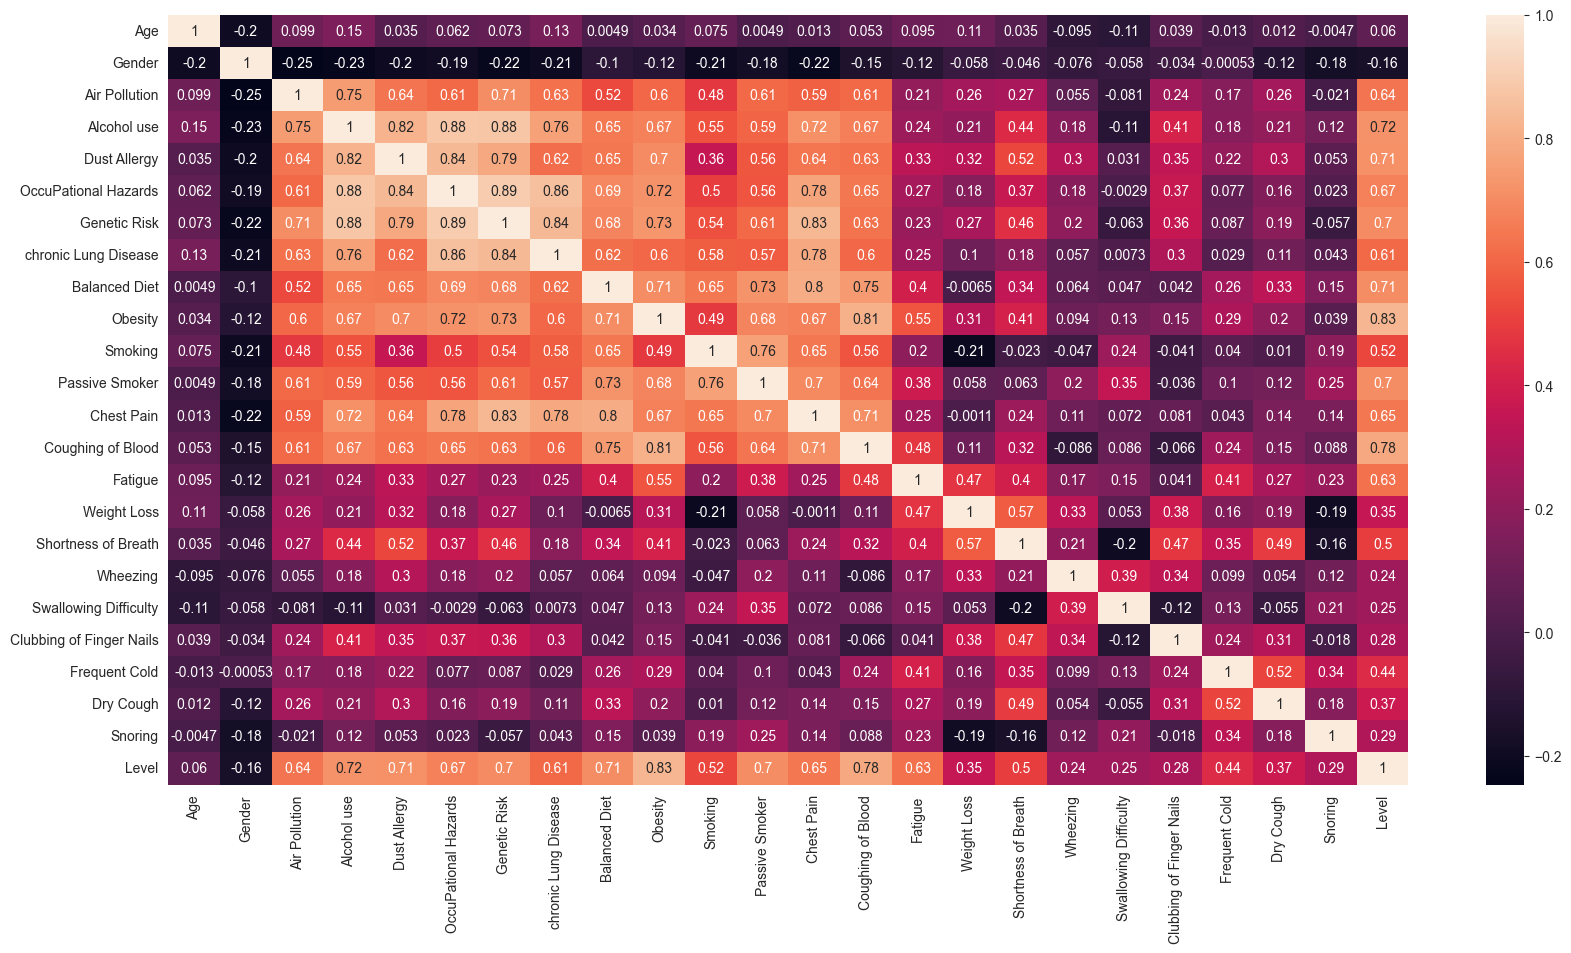

In [11]:
# Corelation Matrix
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

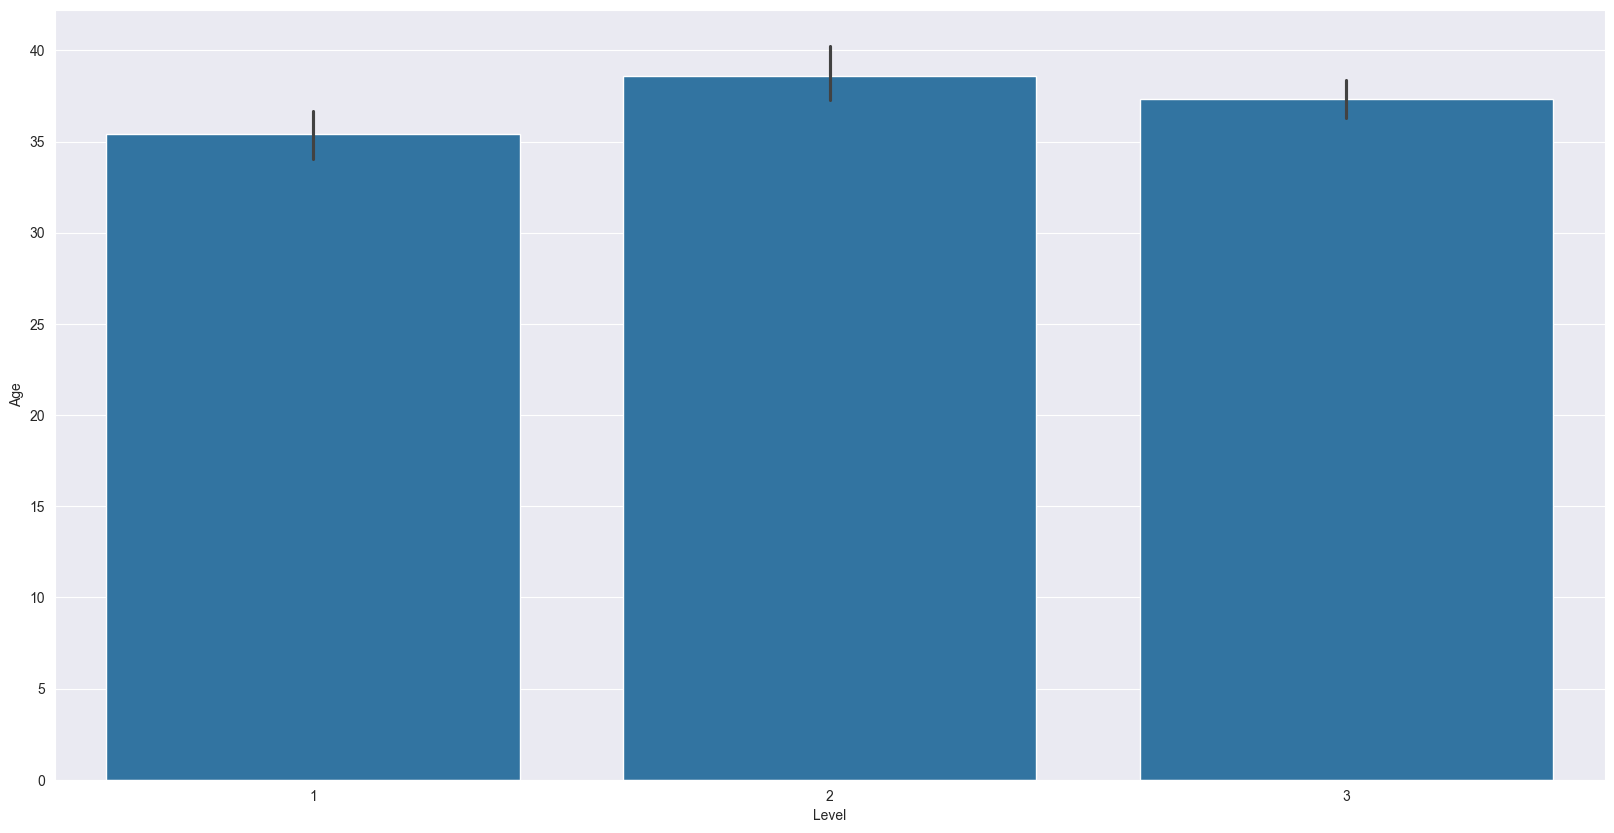

In [15]:
# Plot a graph with age and level
plt.figure(figsize=(20,10))
sns.barplot(x='Level', y='Age', data=data)
plt.show()

In [16]:
# Creating the prediction model
X = data.drop('Level', axis=1)
y = data['Level']

In [17]:
# Encoding the data
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=10)

In [32]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Predictions
y_pred = rf.predict(X_test)

In [34]:
# Accuracy
accuracy_score(y_test, y_pred)

1.0

In [35]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       241
           3       1.00      1.00      1.00       246

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [36]:
# Saving the model
import joblib
joblib.dump(rf, 'lung_cancer_model.sav')

['lung_cancer_model.sav']

In [38]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[213,   0,   0],
       [  0, 241,   0],
       [  0,   0, 246]])

In [39]:
# Import the model
model = joblib.load('lung_cancer_model.sav')

In [40]:
# Predictions
y_pred_1=model.predict(X_test)
y_pred_1

array([2, 3, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 3, 1, 3, 1,
       3, 3, 3, 2, 2, 1, 1, 2, 1, 2, 3, 1, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2,
       3, 3, 1, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       2, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 3, 3, 3, 2,
       1, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 3, 1, 1, 1, 2, 3, 3,
       1, 3, 2, 1, 1, 3, 2, 2, 1, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1, 2, 2, 3,
       1, 3, 1, 1, 1, 3, 1, 3, 2, 1, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 2, 2,
       2, 3, 1, 3, 3, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 3, 2, 3, 1, 3, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 3, 3, 1, 2, 2,
       1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1,
       1, 2, 1, 3, 2, 2, 2, 1, 3, 2, 3, 1, 2, 2, 3, 2, 3, 1, 1, 3, 1, 2,
       3, 2, 3, 3, 3, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 3, 3, 3, 2, 2, 3,
       3, 2, 2, 1, 1, 3, 3, 2, 3, 1, 3, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 2,
       3, 2, 2, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2,